In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# random linear data: 100 between 0-50
n = 100
X = np.linspace(0, 50, n)
y = np.linspace(0, 50, n)

# Adding noise to the random linear data 
X += np.random.uniform(-10, 10, n)
y += np.random.uniform(-10, 10, n)

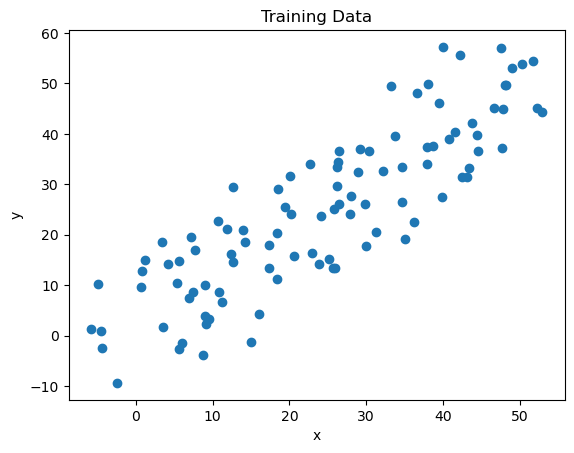

In [4]:
# Plot the training data
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.show()


In [5]:
class LinearModel:
    def __init__(self):
        # y_pred = W*X + b
        self.W = tf.Variable(13.0)
        self.b = tf.Variable(4.0)

    # loss function
    def loss(self, y, y_pred):
        # calculates the mean square error
        return tf.reduce_mean(tf.square(y - y_pred))
        
    # train function
    def train(self, X, y, lr=0.0001, epochs=20, verbose=True):
        def train_step():
            with tf.GradientTape() as t:
                current_loss = self.loss(y, self.predict(X))

            dW, db = t.gradient(current_loss, [self.W, self.b])
            self.W.assign_sub(lr * dW)  # W -= lr * dW
            self.b.assign_sub(lr * db)
            return current_loss

        for epoch in range(epochs):
            current_loss = train_step()
            if verbose:
                print(f'Epoch {epoch}: loss: {current_loss.numpy()}') #eager execution

    def predict(self, X):
        return self.W * X + self.b
        

Epoch 0: loss: 124765.109375
Epoch 1: loss: 86082.9765625
Epoch 2: loss: 59400.33984375
Epoch 3: loss: 40994.8515625
Epoch 4: loss: 28298.88671875
Epoch 5: loss: 19541.3046875
Epoch 6: loss: 13500.388671875
Epoch 7: loss: 9333.4111328125
Epoch 8: loss: 6459.06103515625
Epoch 9: loss: 4476.35546875
Epoch 10: loss: 3108.700927734375
Epoch 11: loss: 2165.302978515625
Epoch 12: loss: 1514.5535888671875
Epoch 13: loss: 1065.671875
Epoch 14: loss: 756.03662109375
Epoch 15: loss: 542.452392578125
Epoch 16: loss: 395.1237487792969
Epoch 17: loss: 293.4975280761719
Epoch 18: loss: 223.3964080810547
Epoch 19: loss: 175.04122924804688
Epoch 20: loss: 141.68617248535156
Epoch 21: loss: 118.67814636230469
Epoch 22: loss: 102.80734252929688
Epoch 23: loss: 91.85980224609375
Epoch 24: loss: 84.3082504272461
Epoch 25: loss: 79.0992660522461
Epoch 26: loss: 75.50613403320312
Epoch 27: loss: 73.02761840820312
Epoch 28: loss: 71.31796264648438
Epoch 29: loss: 70.13866424560547
Epoch 30: loss: 69.32517242

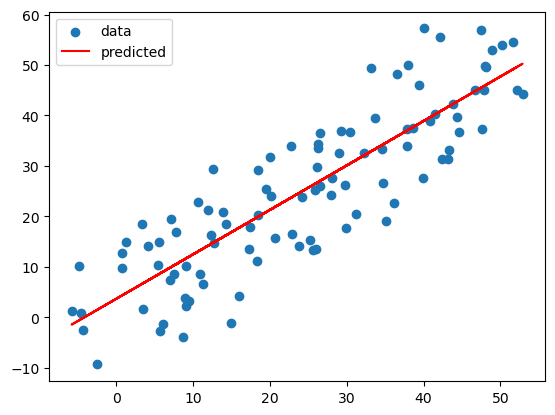

In [6]:
# Using the MOdel

model = LinearModel()
model.train(X, y, epochs=40)
plt.scatter(X, y, label='data')
plt.plot(X, model.predict(X), 'r-', label='predicted')
plt.legend()